# Start Here

#### We still have our clean dataset saved as "data.csv".

# Statistical Data Analysis

#### Importing relevant packages and also load the csv file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
from pingouin import kruskal, ttest

data = pd.read_csv('data.csv')

In [2]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Hypothesis Test

### We will select and compare the mean of 2 sub-group in room type.

We will run unpooled two-sample t-test, where the hypotheses are follow:

$H_0$: $\mu_1$ = $\mu_2$

$H_a$: $\mu_1$ $\neq$ $\mu_2$


In [3]:
# "Entire House"
price_eh = data[(data['room_type'] == 'Entire home/apt')].price
# "Private Room"
price_pr = data[(data['room_type'] == 'Private room')].price
# "Shared Room"
price_sr = data[(data['room_type'] == 'Shared room')].price

In [4]:
def compare(a, b):
    t, pval = stats.ttest_ind(a, b, equal_var=False)
    print('The first group\'s mean is ' + str(round(a.mean(),2)) + '.')
    print('The second group\'s mean is ' + str(round(b.mean(),2)) + '.')
    print('The t-statistics is ' + str(round(t,2)) + ', and the p-value is ' + str(round(pval,2)) + '.')

    if pval < 0.05:
        print('\nSince the p-value is less than 0.05, we reject the Null hypothesis and conclude that the mean of the two samples are different at 95% significance level.')
    else:
        print('\nSince the p-value is greater than 0.05, we fail to reject the Null hypothesis at 95% significance level and conclude that there is not enough evidence to say the two means are different.')
    
    print('\nThe below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.')
    plt.hist(a[(a < a.quantile(.95))], bins = 100, alpha=0.5, label='first group')
    plt.hist(b[(b < b.quantile(.95))], bins = 100, alpha=0.5, label='second group')
    plt.legend(loc='upper right')
    plt.show()
    
    return



The first group's mean is 211.79.
The second group's mean is 89.78.
The t-statistics is 58.67, and the p-value is 0.0.

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that the mean of the two samples are different at 95% significance level.

The below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.


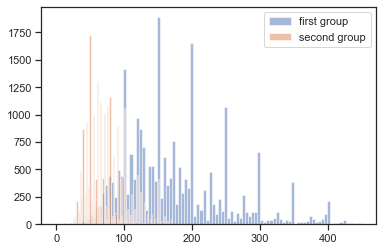

In [5]:
compare(price_eh, price_pr)

The first group's mean is 211.79.
The second group's mean is 70.13.
The t-statistics is 40.73, and the p-value is 0.0.

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that the mean of the two samples are different at 95% significance level.

The below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.


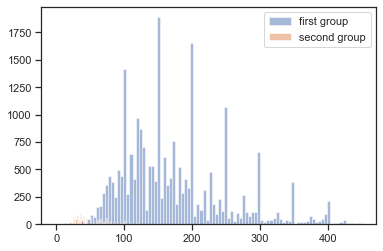

In [6]:
compare(price_eh, price_sr)

The first group's mean is 211.79.
The second group's mean is 70.13.
The t-statistics is 40.73, and the p-value is 0.0.

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that the mean of the two samples are different at 95% significance level.

The below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.


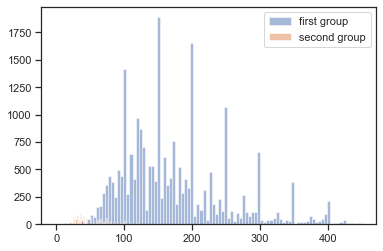

In [7]:
compare(price_eh, price_sr)

### Next, we will run some hypothesis test for the boroughs

We can still use the hypotheses and function definted above.

In [8]:
# "Bronx"
price_bx = data[(data['neighbourhood_group'] == 'Bronx')].price
# "Brooklyn"
price_bkl = data[(data['neighbourhood_group'] == 'Brooklyn')].price
# "Manhanttan"
price_man = data[(data['neighbourhood_group'] == 'Manhattan')].price
# "Queens"
price_queens = data[(data['neighbourhood_group'] == 'Queens')].price
# "Staten Island"
price_si = data[(data['neighbourhood_group'] == 'Staten Island')].price

In [9]:
print(len(price_bx))
print(len(price_si))

1091
373


Recall that Bronx and Staten Island does not contain many samples. We won't put much effort into those 2 sub-groups.

The first group's mean is 87.5.
The second group's mean is 114.81.
The t-statistics is -1.85, and the p-value is 0.06.

Since the p-value is greater than 0.05, we fail to reject the Null hypothesis at 95% significance level and conclude that there is not enough evidence to say the two means are different.

The below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.


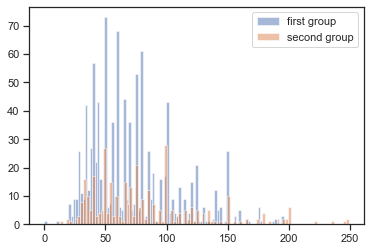

In [10]:
compare(price_bx, price_si)

The first group's mean is 196.88.
The second group's mean is 124.38.
The t-statistics is 30.48, and the p-value is 0.0.

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that the mean of the two samples are different at 95% significance level.

The below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.


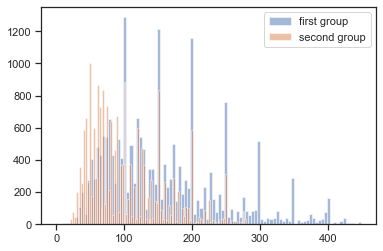

In [11]:
compare(price_man, price_bkl)

The first group's mean is 196.88.
The second group's mean is 99.52.
The t-statistics is 32.73, and the p-value is 0.0.

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that the mean of the two samples are different at 95% significance level.

The below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.


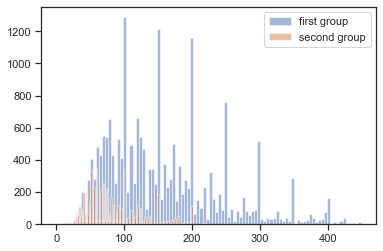

In [12]:
compare(price_man, price_queens)

The first group's mean is 124.38.
The second group's mean is 99.52.
The t-statistics is 9.63, and the p-value is 0.0.

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that the mean of the two samples are different at 95% significance level.

The below plot have some extreme value removed from both group for the purpose of visualizing where the prices are for each group.


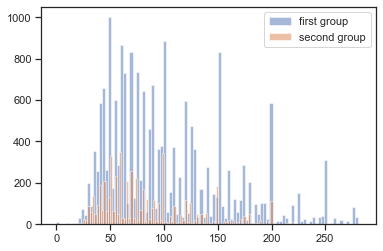

In [13]:
compare(price_bkl, price_queens)

# Correlation Coefficient

Below are the hypotheses for the test of pearson correlation coefficient:

$H_0$: $\rho$ = $0$

$H_a$: $\rho$ $\neq$ $0$

Rho, or $\rho$, is the correlation coefficent between the two variables that we are testing.

We will definte a function called "test(x)." The test function will test for the correlation between price and the input variable, "x." The confidence level is 5% and this will be a two-tailed test.

In [14]:
def test(x, y=data.price):
    slope, intercept, rvalue, pvalue, std = stats.linregress(y, x)
    _ = sns.jointplot(y, x, kind="reg")
    print('The Correlation Coefficient(Rho) is ' + str(round(rvalue, 5)), ' and the P-value for Rho is ' + str(round(pvalue, 5)) + '.')
    
    if pvalue < 0.05:
        print('\nTherefore, we reject the Null hypothesis and conclude that the observed Rho is significantly different from 0 at 95% confidence level.')
    else:
        print('\nTherefore, we fail to reject the Null hypothesis at 95% significance level and conclude there is not enough evidence to say the observed Rho is not equal to 0.')
    
    print('\nBelow is a scatterplot and the slope of the linear regression line is ' + str(round(slope, 5)) + '.')
    return

The Correlation Coefficient(Rho) is 0.0428  and the P-value for Rho is 0.0.

Therefore, we reject the Null hypothesis and conclude that the observed Rho is significantly different from 0 at 95% confidence level.

Below is a scatterplot and the slope of the linear regression line is 0.00366.


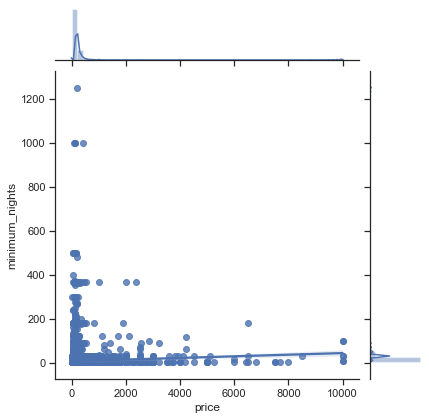

In [15]:
test(data.minimum_nights)

The Correlation Coefficient(Rho) is 0.05747  and the P-value for Rho is 0.0.

Therefore, we reject the Null hypothesis and conclude that the observed Rho is significantly different from 0 at 95% confidence level.

Below is a scatterplot and the slope of the linear regression line is 0.00789.


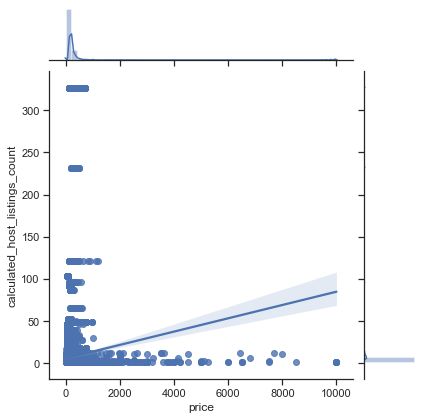

In [16]:
test(data.calculated_host_listings_count)

The Correlation Coefficient(Rho) is -0.04795  and the P-value for Rho is 0.0.

Therefore, we reject the Null hypothesis and conclude that the observed Rho is significantly different from 0 at 95% confidence level.

Below is a scatterplot and the slope of the linear regression line is -0.0089.


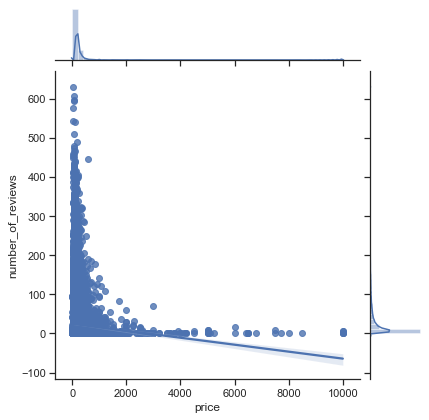

In [17]:
test(data.number_of_reviews)

# Correlation Coefficient continue

In [18]:
data_new = data[['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [19]:
data_new.head()

,price,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,40.64749,-73.97237,1,9,0.21,6,365
1,225,40.75362,-73.98377,1,45,0.38,2,355
2,150,40.80902,-73.94190,3,0,0.00,1,365
3,89,40.68514,-73.95976,1,270,4.64,1,194
4,80,40.79851,-73.94399,10,9,0.10,1,0


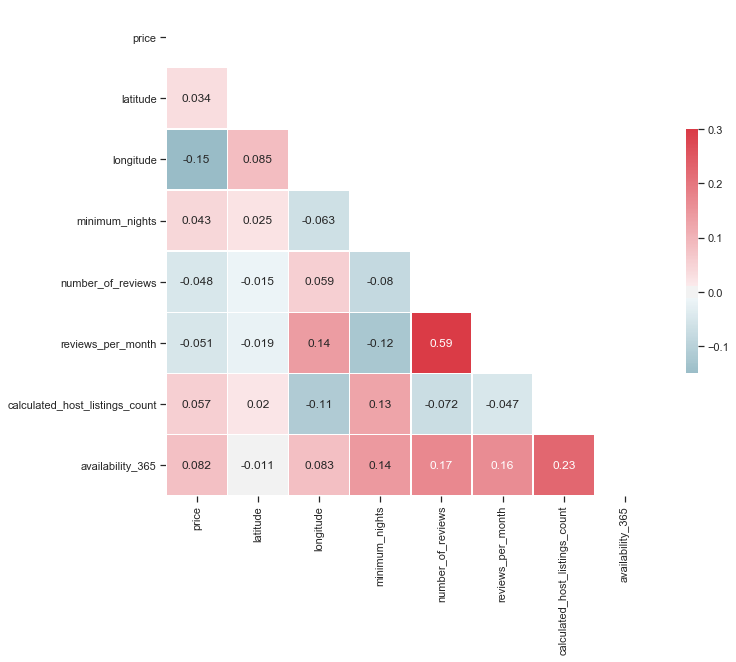

In [20]:
data_corr = data_new.corr()

mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Above is a correlation matrix that shows all the correlation coefficient of all non-categorical variables.